In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump

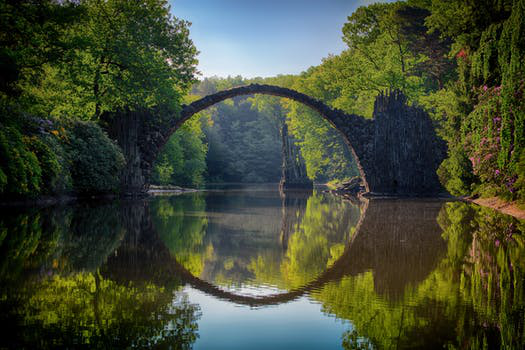

In [2]:
# import image
im = Image.open("image1.png")
# display image
im

In [3]:
# get pixels of the image
pixel_np = np.asarray(im)
# reshape array (remove rows and columns)
image_height = im.height
image_width = im.width
pixel_np = np.reshape(pixel_np, (image_height * image_width,3))
# display as df
pd.DataFrame(pixel_np, columns=["r", "g", "b"]).head()

,r,g,b
0,0,11,0
1,0,15,0
2,10,23,5
3,27,38,21
4,34,42,27


In [4]:
# run k-means clustering on the pixel data
num_of_centroids = 16 # a 4-bit image is represented by 2^4 colours
num_of_runs = 10 # number of times to run the k-means algorithm before determining the best centroids
max_iterations = 300 # number of iterations before k-means comes to an end for a single run
verbosity = 0 # show what's going on when the algorithm is running

# initiate a kmeans object
compressor = KMeans(n_clusters=num_of_centroids, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
# run k-means clustering
compressor.fit(pixel_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# save the fitted model
dump(compressor, "compressor.joblib")

['compressor.joblib']

In [6]:
# create an array replacing each pixel label with its corresponding cluster centroid
pixel_centroid = np.array([list(compressor.cluster_centers_[label]) for label in compressor.labels_])

In [7]:
# convert the array to an unsigned integer type
pixel_centroid = pixel_centroid.astype("uint8")
# reshape this array according to the height and width of our image
pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_height, image_width, 3), "C")

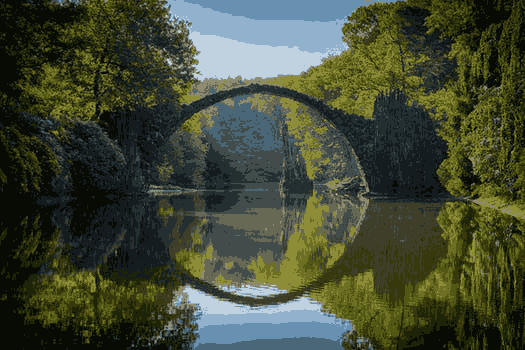

In [8]:
# create the compressed image
compressed_im = Image.fromarray(pixel_centroids_reshaped)
# save compressed image
compressed_im.save("bridge_compressed.jpeg")
# display compressed image
compressed_im

In [9]:
# run k-means clustering on the pixel data
num_of_centroids = 16 # a 4-bit image is represented by 2^4 colours
num_of_runs = 10 # number of times to run the k-means algorithm before determining the best centroids
max_iterations = 300 # number of iterations before k-means comes to an end for a single run
verbosity = 0 # show what's going on when the algorithm is running

# initiate a kmeans object
compressor = KMeans(n_clusters=num_of_centroids, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
# run k-means clustering
compressor.fit(pixel_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# save the fitted model
dump(compressor, "compressor1.joblib")

['compressor1.joblib']

In [11]:
# create an array replacing each pixel label with its corresponding cluster centroid
pixel_centroid = np.array([list(compressor.cluster_centers_[label]) for label in compressor.labels_])

In [12]:
# convert the array to an unsigned integer type
pixel_centroid = pixel_centroid.astype("uint8")
# reshape this array according to the height and width of our image
pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_height, image_width, 3), "C")

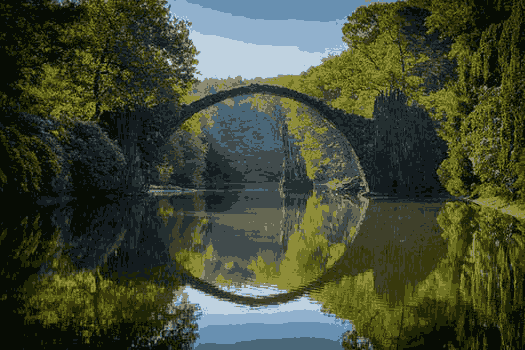

In [13]:
# create the compressed image
compressed_im = Image.fromarray(pixel_centroids_reshaped)
# save compressed image
compressed_im.save("bridge_compressed1.jpeg")
# display compressed image
compressed_im